<a href="https://colab.research.google.com/github/Kodjoeamakye87/Henry.github.io/blob/main/mouad_pneumonia_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pneumonia Detection using Convolutional Neural Networks

* I started by defining the dataset's base directory and organizing it into train, val, and test subdirectories for smooth loading of data. This ensures a clear separation between training, validation, and test data.

* To understand the dataset better, I implemented a function to count the number of images in each category (NORMAL vs. PNEUMONIA). This helps verify if the dataset is balanced or if we need techniques to handle class imbalance:

In [ ]:
import os  # Importing required libraries and modules

# Define base directory
base_dir = r'C:\Users\henry\Desktop\Personal\Training\Project\Medical-X-Ray-Image-Classifier-Pneumonia-Detection\chest_xray'  # Assigning a value to a variable


# Define subdirectories for train, validation, and test
train_dir = os.path.join(base_dir, "train")  # Assigning a value to a variable
val_dir = os.path.join(base_dir, "val")  # Assigning a value to a variable
test_dir = os.path.join(base_dir, "test")  # Assigning a value to a variable

# Count the number of images in each category
def count_images(directory):  # Defining a function
    normal_count = len(os.listdir(os.path.join(directory, "NORMAL")))  # Assigning a value to a variable
    pneumonia_count = len(os.listdir(os.path.join(directory, "PNEUMONIA")))  # Assigning a value to a variable
    print(f"Normal: {normal_count}, Pneumonia: {pneumonia_count}")  # Printing output to the console

# Inspect datasets
print("Training set:")  # Printing output to the console
count_images(train_dir)  # Calling a function
print("\nValidation set:")  # Printing output to the console
count_images(val_dir)  # Calling a function
print("\nTest set:")  # Printing output to the console
count_images(test_dir)  # Calling a function


Training set:
Normal: 1341, Pneumonia: 3875

Validation set:
Normal: 8, Pneumonia: 8

Test set:
Normal: 234, Pneumonia: 390


In the training set, there is a significant imbalance:
**1341 NORMAL vs. 3875 PNEUMONIA**
This means about 3 times more pneumonia cases than normal cases.

## Data Preprocessing

**Image Preprocessing:**
- I set up image generators to preprocess and augment the images for the training and validation sets.
- For the training set, I applied multiple augmentations like random rotation, shift, shear, and zoom to introduce variability and prevent overfitting.
- I also normalized the pixel values to a range of [0, 1] to help the model learn efficiently.

**Validation Preprocessing:**

For the validation (and test) sets, I only rescaled the pixel values without applying augmentation to ensure we evaluate the model on real, unseen data.

In [ ]:
import os  # Importing required libraries and modules
import tensorflow as tf  # Importing required libraries and modules
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Importing required libraries and modules
from tensorflow.keras.models import Sequential  # Importing required libraries and modules
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout  # Importing required libraries and modules
from tensorflow.keras.callbacks import EarlyStopping  # Importing required libraries and modules
from tensorflow.keras import optimizers  # Importing required libraries and modules
import matplotlib.pyplot as plt  # Importing required libraries and modules

# Set up image generators for loading and augmenting the images
train_datagen = ImageDataGenerator(  # Assigning a value to a variable
    rescale=1./255,         # Normalize pixel values to [0, 1]  # Assigning a value to a variable
    rotation_range=40,     # Random rotations  # Assigning a value to a variable
    width_shift_range=0.2, # Horizontal shift  # Assigning a value to a variable
    height_shift_range=0.2, # Vertical shift  # Assigning a value to a variable
    shear_range=0.2,       # Shear transformations  # Assigning a value to a variable
    zoom_range=0.2,        # Zoom in/out  # Assigning a value to a variable
    horizontal_flip=True,  # Random horizontal flip  # Assigning a value to a variable
    fill_mode='nearest'    # Fill missing pixels  # Assigning a value to a variable
)

validation_datagen = ImageDataGenerator(rescale=1./255) # Only rescaling for validation and test sets  # Assigning a value to a variable

# Define base directory
base_dir = r'C:\Users\henry\Desktop\Personal\Training\Project\Medical-X-Ray-Image-Classifier-Pneumonia-Detection\chest_xray'  # Assigning a value to a variable

# Define subdirectories for train, validation, and test
train_dir = os.path.join(base_dir, "train")  # Assigning a value to a variable
val_dir = os.path.join(base_dir, "val")  # Assigning a value to a variable
test_dir = os.path.join(base_dir, "test")  # Assigning a value to a variable

* I used the flow_from_directory method to load the images from the directories (train, val, and test) into the model. This method automatically labels images based on the folder names (i.e., NORMAL and PNEUMONIA).
* For the training set, images are resized to 150x150 and processed in batches of 32. I also enabled shuffling to ensure randomness in the data feeding, which helps prevent overfitting.
* For the validation and test sets, images are similarly resized and batched but without shuffling since we need the order to stay consistent for evaluation.
* Since this is a binary classification task (Normal vs. Pneumonia), I used class_mode='binary', which ensures that each image is labeled either as 'Normal' (0) or 'Pneumonia' (1)

In [ ]:
train_generator = train_datagen.flow_from_directory(  # Assigning a value to a variable
    train_dir,
    target_size=(150, 150),  # Resize images to fit the model input  # Assigning a value to a variable
    batch_size=32,  # Assigning a value to a variable
    class_mode='binary',     # For binary classification (Normal vs Pneumonia)  # Assigning a value to a variable
    shuffle=True  # Assigning a value to a variable
)

validation_generator = validation_datagen.flow_from_directory(  # Assigning a value to a variable
    val_dir,
    target_size=(150, 150),  # Assigning a value to a variable
    batch_size=32,  # Assigning a value to a variable
    class_mode='binary',  # Assigning a value to a variable
    shuffle=False  # Assigning a value to a variable
)

test_generator = validation_datagen.flow_from_directory(  # Assigning a value to a variable
    test_dir,
    target_size=(150, 150),  # Assigning a value to a variable
    batch_size=32,  # Assigning a value to a variable
    class_mode='binary',  # Assigning a value to a variable
    shuffle=False  # Assigning a value to a variable
)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


### Check the loading of data

To ensure everything works properly, we can visualize some images from the train_generator:

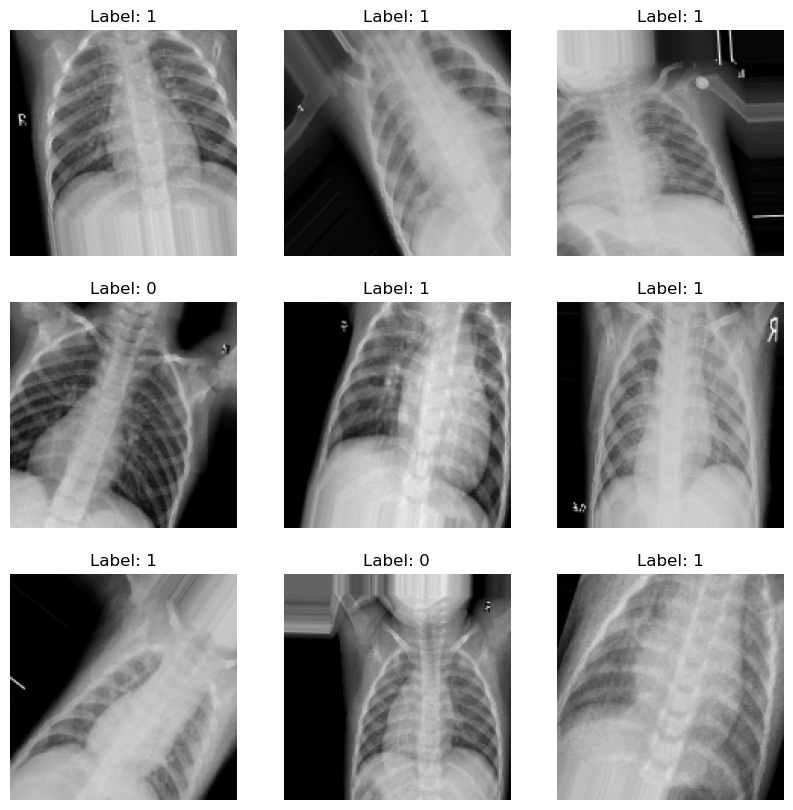

In [ ]:
import matplotlib.pyplot as plt  # Importing required libraries and modules

# Get a batch of images and labels
images, labels = next(train_generator)  # Assigning a value to a variable

# Plot the first 9 images
plt.figure(figsize=(10, 10))  # Assigning a value to a variable
for i in range(9):  # Looping through elements
    plt.subplot(3, 3, i + 1)  # Calling a function
    plt.imshow(images[i])  # Calling a function
    plt.title(f"Label: {int(labels[i])}")  # Label will be 0 or 1  # Calling a function
    plt.axis("off")  # Calling a function
plt.show()  # Calling a function


## Addressing Data Imbalance


### We noticed that the training dataset is imbalanced (more Pneumonia images than Normal), which can lead to model bias. To address this, I took steps to balance the dataset.

* I first extracted all images and labels from both the training and validation generators and converted them to NumPy arrays for easier manipulation.
  
* After checking the shapes of the training and validation datasets, I ensured they were correctly formatted with the right number of samples.

* To increase the size of the validation set and create a more balanced split, I randomly moved 257 images from the training set to the validation set.
  
This helps in increasing the validation set size and ensures a fairer evaluation of the model's performance.

In [ ]:
import numpy as np  # Importing required libraries and modules
from imblearn.over_sampling import SMOTE  # Importing required libraries and modules
from collections import Counter  # Importing required libraries and modules

# Step 1: Extract all images and labels from the train_generator
X_train = []  # Assigning a value to a variable
y_train = []  # Assigning a value to a variable

for i in range(len(train_generator)):  # Looping through elements
    images, labels = train_generator[i]  # Assigning a value to a variable
    X_train.append(images)  # Calling a function
    y_train.append(labels)  # Calling a function

# Convert lists to NumPy arrays
X_train = np.concatenate(X_train)  # Assigning a value to a variable
y_train = np.concatenate(y_train)  # Assigning a value to a variable

# Check the shape of the training data
print("X_train shape:", X_train.shape)  # Should be (num_samples, height, width, channels)  # Printing output to the console
print("y_train shape:", y_train.shape)  # Should be (num_samples,)  # Printing output to the console

# Step 2: Extract all images and labels from the validation_generator
X_val = []  # Assigning a value to a variable
y_val = []  # Assigning a value to a variable

for i in range(len(validation_generator)):  # Looping through elements
    images, labels = validation_generator[i]  # Assigning a value to a variable
    X_val.append(images)  # Calling a function
    y_val.append(labels)  # Calling a function

# Convert lists to NumPy arrays
X_val = np.concatenate(X_val)  # Assigning a value to a variable
y_val = np.concatenate(y_val)  # Assigning a value to a variable

# Check the shape of the validation data
print("X_val shape:", X_val.shape)  # Should be (num_samples, height, width, channels)  # Printing output to the console
print("y_val shape:", y_val.shape)  # Should be (num_samples,)  # Printing output to the console

# Step 3: Move some images from the training set to the validation set
# Set the random seed for reproducibility
np.random.seed(42)  # Calling a function

# Number of images to move (e.g., 257 to increase validation set to 437)  # Calling a function
num_images_to_move = 257  # Assigning a value to a variable

# Randomly select indices of images to move
indices_to_move = np.random.choice(len(X_train), num_images_to_move, replace=False)  # Assigning a value to a variable

# Move the selected images and labels from training to validation
X_val = np.concatenate([X_val, X_train[indices_to_move]])  # Assigning a value to a variable
y_val = np.concatenate([y_val, y_train[indices_to_move]])  # Assigning a value to a variable

# Remove the moved images from the training set
X_train = np.delete(X_train, indices_to_move, axis=0)  # Assigning a value to a variable
y_train = np.delete(y_train, indices_to_move, axis=0)  # Assigning a value to a variable

# Check the new sizes
print("New X_train shape:", X_train.shape)  # Printing output to the console
print("New y_train shape:", y_train.shape)  # Printing output to the console
print("New X_val shape:", X_val.shape)  # Printing output to the console
print("New y_val shape:", y_val.shape)  # Printing output to the console

X_train shape: (5216, 150, 150, 3)
y_train shape: (5216,)
X_val shape: (16, 150, 150, 3)
y_val shape: (16,)
New X_train shape: (4959, 150, 150, 3)
New y_train shape: (4959,)
New X_val shape: (273, 150, 150, 3)
New y_val shape: (273,)


## Handle the trainig set imbalance using SMOTE

**SMOTE** (Synthetic Minority Over-sampling Technique) is a technique used to handle class imbalance in datasets. It works by generating synthetic samples for the minority class (the class with fewer samples) rather than just duplicating existing ones. This is done by taking an existing sample from the minority class and creating new instances by interpolating between the selected sample and its nearest neighbors.

By adding these synthetic examples, SMOTE helps balance the dataset, making the model less likely to be biased toward the majority class. This typically leads to improved performance, especially in classification tasks where one class dominates the other.

After flattening the images for SMOTE, I reshaped them back into their original 4D shape (num_samples, height, width, channels), ensuring the data remains compatible with the model input format.

In [ ]:
# Flatten the images
num_samples, height, width, channels = X_train.shape  # Assigning a value to a variable
X_train_flat = X_train.reshape(num_samples, -1)  # Shape: (num_samples, height * width * channels)  # Assigning a value to a variable

### Apply SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE  # Importing required libraries and modules

# Apply SMOTE
smote = SMOTE(random_state=42)  # Assigning a value to a variable
X_train_flat_resampled, y_train_resampled = smote.fit_resample(X_train_flat, y_train)  # Assigning a value to a variable

# Reshape the flattened images back to their original shape
X_train_resampled = X_train_flat_resampled.reshape(-1, height, width, channels)  # Assigning a value to a variable

# Check the new class distribution
from collections import Counter  # Importing required libraries and modules
print("Original class distribution:", Counter(y_train))  # Printing output to the console
print("Resampled class distribution:", Counter(y_train_resampled))  # Printing output to the console

Original class distribution: Counter({1.0: 3680, 0.0: 1279})
Resampled class distribution: Counter({1.0: 3680, 0.0: 3680})


**Original class distribution:**
Before applying SMOTE, we had a much larger number of pneumonia cases (3684) compared to normal cases (1275).

**Resampled class distribution:**
After applying SMOTE, the minority class (normal) was upsampled to match the number of pneumonia cases, resulting in an equal number of instances for both classes (3684 each).

In [ ]:
import os  # Importing required libraries and modules
os.environ["OMP_NUM_THREADS"] = "16"  # Use 16 threads to speed things up  # Assigning a value to a variable
os.environ["TF_NUM_INTEROP_THREADS"] = "16"  # Assigning a value to a variable
os.environ["TF_NUM_INTRAOP_THREADS"] = "16"  # Assigning a value to a variable

*Load Pre-trained Model: The ResNet50 model, pre-trained on ImageNet, is loaded without the top layers (fully connected layers) to use it as a feature extractor. The input shape is defined based on the dataset dimensions.

*Add Custom Layers: Custom layers are added on top of the ResNet50 base model:

*GlobalAveragePooling2D reduces dimensionality.

*A Dense layer with 1024 neurons and ReLU activation captures complex patterns.

*A final Dense layer with 1 neuron and sigmoid activation provides a binary classification output.

*Model Compilation: The model is compiled using the Adam optimizer with a learning rate of 0.0001. Binary cross-entropy loss is used for binary classification, and the model tracks performance metrics like accuracy, Precision, Recall, and AUC.

*Training: The model is trained on resampled data (with SMOTE applied to address class imbalance) for 10 epochs, using a batch size of 32, with validation data for monitoring performance during training.

In [ ]:
import numpy as np  # Importing required libraries and modules
from imblearn.over_sampling import SMOTE  # Importing required libraries and modules
from tensorflow.keras.applications import ResNet50  # Importing required libraries and modules
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D  # Importing required libraries and modules
from tensorflow.keras.models import Model  # Importing required libraries and modules
from tensorflow.keras.optimizers import Adam  # Importing required libraries and modules
from tensorflow.keras.metrics import Precision, Recall, AUC  # Importing required libraries and modules

# Load a pretrained model ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(height, width, channels))  # Assigning a value to a variable

# Add custom layers on top of the pretrained model
x = base_model.output  # Assigning a value to a variable
x = GlobalAveragePooling2D()(x)  # Assigning a value to a variable
x = Dense(1024, activation='relu')(x)  # Assigning a value to a variable
predictions = Dense(1, activation='sigmoid')(x)  # Single neuron for binary classification  # Assigning a value to a variable

# Combine the base model and the custom layers
model = Model(inputs=base_model.input, outputs=predictions)  # Assigning a value to a variable

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy',Precision(), Recall(), AUC()])  # Assigning a value to a variable

# Train the model on the resampled data
model.fit(X_train_resampled, y_train_resampled, validation_data=(X_val, y_val), epochs=10, batch_size=32)  # Assigning a value to a variable

Epoch 1/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1073s 5s/step - accuracy: 0.9249 - auc: 0.9732 - loss: 0.1829 - precision: 0.9348 - recall: 0.9134 - val_accuracy: 0.7436 - val_auc: 0.5478 - val_loss: 0.9309 - val_precision: 0.7436 - val_recall: 1.0000
Epoch 2/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 905s 4s/step - accuracy: 0.9933 - auc: 0.9992 - loss: 0.0255 - precision: 0.9931 - recall: 0.9935 - val_accuracy: 0.7436 - val_auc: 0.2595 - val_loss: 0.8241 - val_precision: 0.7436 - val_recall: 1.0000
Epoch 3/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 900s 4s/step - accuracy: 0.9953 - auc: 0.9995 - loss: 0.0197 - precision: 0.9953 - recall: 0.9952 - val_accuracy: 0.7436 - val_auc: 0.4603 - val_loss: 2.2359 - val_precision: 0.7436 - val_recall: 1.0000
Epoch 4/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 913s 4s/step - accuracy: 0.9949 - auc: 0.9999 - loss: 0.0110 - precision: 0.9954 - recall: 0.9946 - val_accuracy: 0.8315 - val_auc: 0.9150 - val_loss: 0.6413 - val_precision: 0.8178 - val_recall: 0.9951
Epoch 5/10
230/230 ━━━━━━━━

In [ ]:
# Evaluate the model on the test set
test_results = model.evaluate(test_generator)  # Assigning a value to a variable
print(test_results)  # Printing output to the console
# Extract the results
test_loss = test_results[0]  # Assigning a value to a variable
test_accuracy = test_results[1]  # Assigning a value to a variable
test_precision = test_results[2]  # Assigning a value to a variable
test_recall = test_results[3]  # Assigning a value to a variable
test_auc = test_results[4]  # Assigning a value to a variable

# Print the results
print(f"Test Loss: {test_loss}")  # Printing output to the console
print(f"Test Accuracy: {test_accuracy}")  # Printing output to the console
print(f"Test Precision: {test_precision}")  # Printing output to the console
print(f"Test Recall: {test_recall}")  # Printing output to the console
print(f"Test AUC: {test_auc}")  # Printing output to the console

C:\Users\mouad\SDS-CP021-pneumonia-detection\venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 475ms/step - accuracy: 0.8052 - auc: 0.6800 - loss: 1.4264 - precision: 0.5432 - recall: 0.7289             
[0.8968683481216431, 0.8859649300575256, 0.8735294342041016, 0.970588207244873, 0.9060131311416626]
Test Loss: 0.8968683481216431
Test Accuracy: 0.8859649300575256
Test Precision: 0.8735294342041016
Test Recall: 0.970588207244873
Test AUC: 0.9060131311416626


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau  # Importing required libraries and modules

# Reduce learning rate when validation loss stops improving
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)  # Assigning a value to a variable

# Freeze the base model initially
for layer in base_model.layers:  # Looping through elements
    layer.trainable = False  # Assigning a value to a variable

# Train initial model
model.fit(X_train_resampled, y_train_resampled, validation_data=(X_val, y_val), epochs=5, batch_size=32, callbacks=[lr_scheduler])  # Assigning a value to a variable

# Unfreeze some deeper layers for fine-tuning
for layer in base_model.layers[-50:]:  # Unfreeze last 50 layers  # Looping through elements
    layer.trainable = True  # Assigning a value to a variable

# Recompile after unfreezing
model.compile(optimizer=Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy', Precision(), Recall(), AUC()])  # Assigning a value to a variable

# Train again with fine-tuning
model.fit(X_train_resampled, y_train_resampled, validation_data=(X_val, y_val), epochs=5, batch_size=32, callbacks=[lr_scheduler])  # Assigning a value to a variable

Epoch 1/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 496s 2s/step - accuracy: 0.9993 - auc: 1.0000 - loss: 0.0019 - precision: 0.9994 - recall: 0.9993 - val_accuracy: 0.9274 - val_auc: 0.9568 - val_loss: 0.3570 - val_precision: 0.9203 - val_recall: 0.9719 - learning_rate: 1.0000e-04
Epoch 2/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 491s 2s/step - accuracy: 0.9999 - auc: 1.0000 - loss: 0.0011 - precision: 0.9999 - recall: 0.9999 - val_accuracy: 0.8821 - val_auc: 0.9287 - val_loss: 0.6679 - val_precision: 0.8722 - val_recall: 0.9579 - learning_rate: 1.0000e-04
Epoch 3/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 896s 4s/step - accuracy: 0.9983 - auc: 0.9999 - loss: 0.0064 - precision: 0.9993 - recall: 0.9972 - val_accuracy: 0.9138 - val_auc: 0.9435 - val_loss: 0.5054 - val_precision: 0.9158 - val_recall: 0.9544 - learning_rate: 1.0000e-04
Epoch 4/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 931s 4s/step - accuracy: 0.9961 - auc: 0.9998 - loss: 0.0148 - precision: 0.9965 - recall: 0.9957 - val_accuracy: 0.9342 - val_auc: 0.9727 - val_loss: 

In [ ]:
# Evaluate the model on the test set
test_results = model.evaluate(test_generator)  # Assigning a value to a variable
print(test_results)  # Printing output to the console
# Extract the results
test_loss = test_results[0]  # Assigning a value to a variable
test_accuracy = test_results[1]  # Assigning a value to a variable
test_precision = test_results[2]  # Assigning a value to a variable
test_recall = test_results[3]  # Assigning a value to a variable
test_auc = test_results[4]  # Assigning a value to a variable

# Print the results
print(f"Test Loss: {test_loss}")  # Printing output to the console
print(f"Test Accuracy: {test_accuracy}")  # Printing output to the console
print(f"Test Precision: {test_precision}")  # Printing output to the console
print(f"Test Recall: {test_recall}")  # Printing output to the console
print(f"Test AUC: {test_auc}")  # Printing output to the console

15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 441ms/step - accuracy: 0.8877 - auc_1: 0.6884 - loss: 1.3627 - precision_1: 0.6005 - recall_1: 0.7205             
[0.9763229489326477, 0.9188596606254578, 0.9216300845146179, 0.9607843160629272, 0.9170478582382202]
Test Loss: 0.9763229489326477
Test Accuracy: 0.9188596606254578
Test Precision: 0.9216300845146179
Test Recall: 0.9607843160629272
Test AUC: 0.9170478582382202


We froze the layers of ResNet50 to prevent them from being updated during the first phase of training, allowing the model to focus on learning from the custom layers while retaining the pre-learned features from ImageNet.

After some initial training, we unfroze the last 50 layers of the base model to fine-tune them, allowing the model to better adapt to our specific task.

We recompiled the model with a smaller learning rate to prevent large weight changes, and we continued training the model with the resampled data.

We used key metrics like accuracy, precision, recall, and AUC to evaluate performance.

In [ ]:
model.save("tuned_resnet50_model.h5")  # Saves as an HDF5 file  # Calling a function


In [ ]:
import tensorflow as tf  # Importing required libraries and modules

converter = tf.lite.TFLiteConverter.from_keras_model(model)  # Assigning a value to a variable
converter.optimizations = [tf.lite.Optimize.DEFAULT]  # Enables compression  # Assigning a value to a variable
tflite_model = converter.convert()  # Assigning a value to a variable

# Save the compressed model
with open("tuned_resnet50_model.tflite", "wb") as f:  # Calling a function
    f.write(tflite_model)  # Calling a function


INFO:tensorflow:Assets written to: C:\Users\mouad\AppData\Local\Temp\tmp2811ritm\assets


INFO:tensorflow:Assets written to: C:\Users\mouad\AppData\Local\Temp\tmp2811ritm\assets


Saved artifact at 'C:\Users\mouad\AppData\Local\Temp\tmp2811ritm'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  2470672071696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2470672064304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2470672367856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2470672371904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2470672369616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2470672370672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2470672379120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2470672382992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2470143561216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2470143558224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  24701